The Stock Market Prediction and Analysis System is a comprehensive project designed to forecast stock prices and provide detailed market insights. The main goal is to equip investors and traders with the tools and information they need to make smarter, more strategic decisions in the stock market. Here’s what the project aims to do:

### Objectives:

- **Predict Stock Prices**: Create models that can accurately forecast future stock prices using historical data and current market conditions.
- **Analyze Market Trends**: Provide insights into market trends and predict potential future movements through both technical and fundamental analysis.
- **Assess Market Sentiment**: Evaluate market sentiment from various sources, such as news articles and social media, to understand how it impacts stock prices.


**Step 1: Collect Historical Stock Price Data**

In [3]:
import pandas as pd

In [4]:
pip install yfinance # used for accessing and downloading historical market data from Yahoo Finance


Downloading stock market

In [5]:
import yfinance as yf  # Import the yfinance library


In [6]:
# Define the stock ticker and the period of data to collect
ticker = 'AAPL'  # Example: Apple Inc.
start_date = '2020-01-01'  #Sets the starting date for the data collection period to January 1, 2020
end_date = '2023-01-01'  #Sets the ending date for the data collection period to January 1, 2023

# Download the historical stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the dataframe
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960464  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251122  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826851  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484337  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650360  132079200


Gather addittiona Data

In [7]:
# Define the period for additional data collection
additional_start_date = '2023-01-02'
additional_end_date = '2024-01-01'

# Download the additional historical stock data
additional_data = yf.download(ticker, start=additional_start_date, end=additional_end_date)

# Display the first few rows of the additional dataset
print(additional_data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048042   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327507   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998444   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560852   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086517   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


**Combine the Datasets**

In [8]:
# Combine the initial data and additional data
combined_data = pd.concat([stock_data, additional_data])

# Display the first few rows of the combined dataset
print(combined_data.head())
print(combined_data.tail())


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960464  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251122  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826851  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484337  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650360  132079200
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.091385   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.542831   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.642548   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.071426   
2023-12-29  193.8

**Check for and Handle Missing Values**

In [9]:
# Check for missing values in the combined dataset
missing_values = combined_data.isnull().sum()
print(missing_values)


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the DataFrame to see all columns
print(combined_data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.960464   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.251122   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.826851   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.484337   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.650360   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.091385   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.542831   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.642548   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.071426   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.024185   

               Volume  
Date         

In [11]:
# One-liner to display names of all columns
print("Column names:", combined_data.columns.tolist())

Column names: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


Dropping less important columns

In [12]:
# Define a threshold for considering columns with missing values as less important
missing_threshold = 0.2  # 20% threshold

In [13]:
# Drop columns with missing values exceeding the threshold
columns_to_drop = combined_data.columns[combined_data.isnull().mean() > missing_threshold]
cleaned_combined_data = combined_data.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print(cleaned_combined_data.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960464  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251122  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826851  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484337  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650360  132079200


**Summary Statistics**

In [14]:
# Display summary statistics
cleaned_combined_data = cleaned_combined_data.describe()
print(cleaned_combined_data)


              Open         High          Low        Close    Adj Close  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean    140.675507   142.321389   139.143536   140.808131   139.024960   
std      33.310018    33.430571    33.179199    33.313857    33.615819   
min      57.020000    57.125000    53.152500    56.092499    54.632893   
25%     123.682503   125.030003   122.157499   123.592501   121.328167   
50%     145.540001   147.264999   144.120003   145.860001   143.920906   
75%     166.302498   168.147503   164.815002   166.214996   164.457199   
max     198.020004   199.619995   197.000000   198.110001   197.589523   

             Volume  
count  1.006000e+03  
mean   9.895211e+07  
std    5.439653e+07  
min    2.404830e+07  
25%    6.407675e+07  
50%    8.467540e+07  
75%    1.155069e+08  
max    4.265100e+08  


This is the summary in table format:

| Statistic          | Open        | High        | Low         | Close       | Adj Close   | Volume            |
|--------------------|-------------|-------------|-------------|-------------|-------------|-------------------|
| Count              | 1006        | 1006        | 1006        | 1006        | 1006        | 1006              |
| Mean               | 140.68      | 142.32      | 139.14      | 140.81      | 139.02      | 9.89e+07          |
| Standard Deviation | 33.31       | 33.43       | 33.18       | 33.31       | 33.62       | 5.44e+07          |
| Minimum            | 57.02       | 57.13       | 53.15       | 56.09       | 54.63       | 2.40e+07          |
| Maximum            | 198.02      | 199.62      | 197.00      | 198.11      | 197.59      | 4.27e+08          |
| 25th Percentile   | 123.68      | 125.03      | 122.16      | 123.59      | 121.33      | 6.41e+07          |
| 50th Percentile   | 145.54      | 147.26      | 144.12      | 145.86      | 143.92      | 8.47e+07          |
| 75th Percentile   | 166.30      | 168.15      | 164.82      | 166.21      | 164.46      | 1.16e+08          |

Explanation:

- **Count**: Indicates the number of observations for each column, showing the data's completeness.

- **Mean**: Represents the average value of each column, providing insight into the typical magnitude of the data.

- **Standard Deviation**: Measures the dispersion or spread of values around the mean. Higher values indicate greater variability.

- **Minimum and Maximum**: Identify the range of observed values for each column, highlighting the lowest and highest points in the dataset.

- **25th, 50th, and 75th Percentiles**: Divide the data into quarters, indicating typical values and extremes. The 50th percentile (median) represents the middle value of the dataset.

**Data Visualization**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


*Drawing a Histogram* - useful for understanding the distribution of a single variable. They show the frequency or count of values within predefined intervals, providing insights into the data's spread and shape.

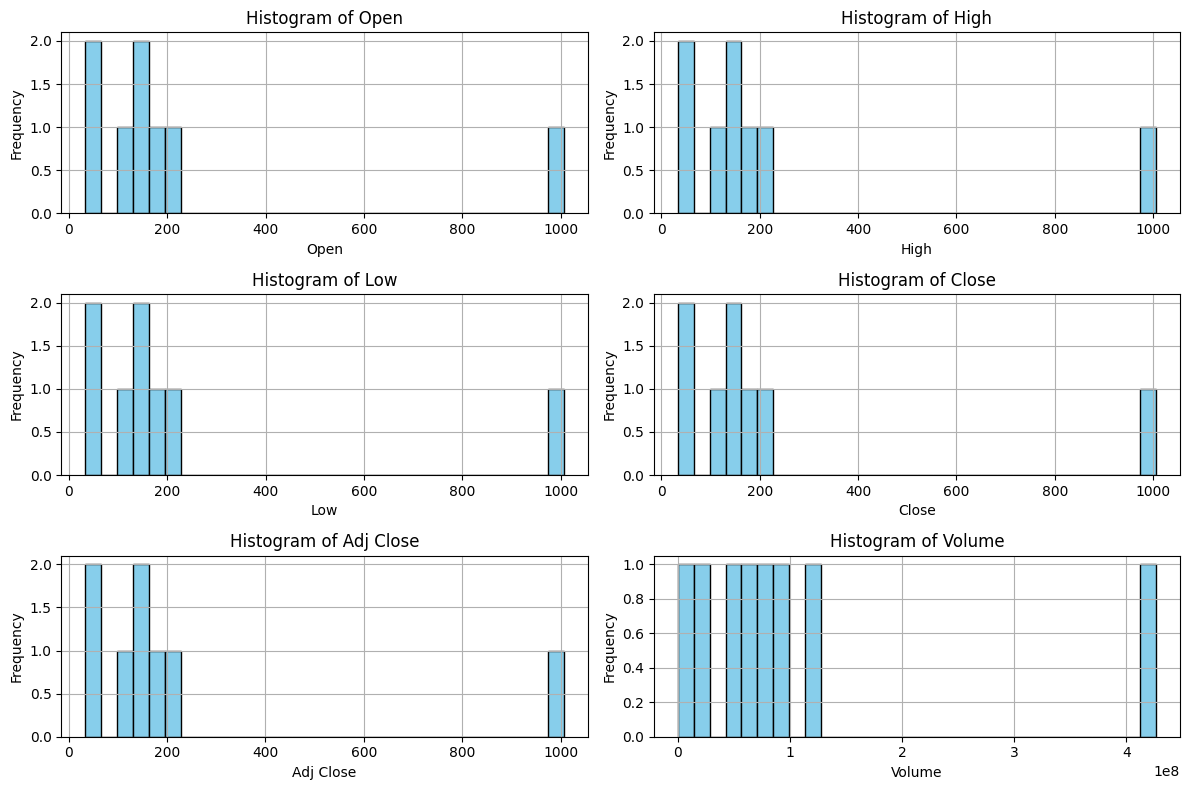

In [16]:
# Plot histograms for each numeric variable
plt.figure(figsize=(12, 8))  # Set the size of the figure
for i, column in enumerate(cleaned_combined_data.columns):  # Iterate over each column in the dataframe
    plt.subplot(3, 2, i+1)  # Create subplots in a grid layout
    cleaned_combined_data[column].hist(bins=30, color='skyblue', edgecolor='black')  # Plot the histogram of the column
    plt.title(f'Histogram of {column}')  # Set the title of the subplot
    plt.xlabel(column)  # Set the label for the x-axis
    plt.ylabel('Frequency')  # Set the label for the y-axis
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()  # Display the plot


*Boxplots* - summarize the distribution of a variable by displaying key statistics such as the median, quartiles, and potential outliers. They are particularly useful for identifying variability and comparing distributions between different variables.

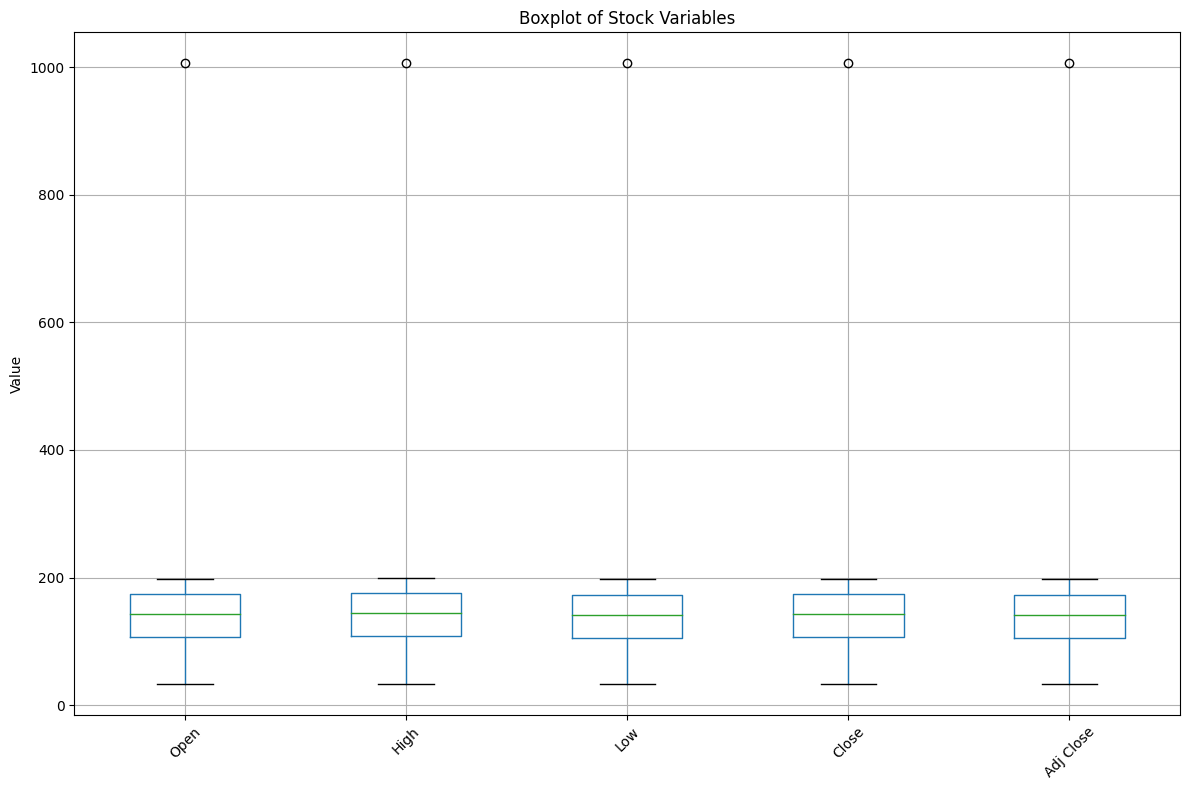

In [17]:
# Plot boxplots for each numeric variable
plt.figure(figsize=(12, 8))  # Set the size of the figure
cleaned_combined_data.boxplot(column=list(cleaned_combined_data.columns[:-1]))  # Plot boxplots for all numeric columns except the last one ('Volume') for better visualization
plt.title('Boxplot of Stock Variables')  # Set the title of the plot
plt.ylabel('Value')  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees for better readability
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()  # Display the plot


*Time series plot* - used for showing trends

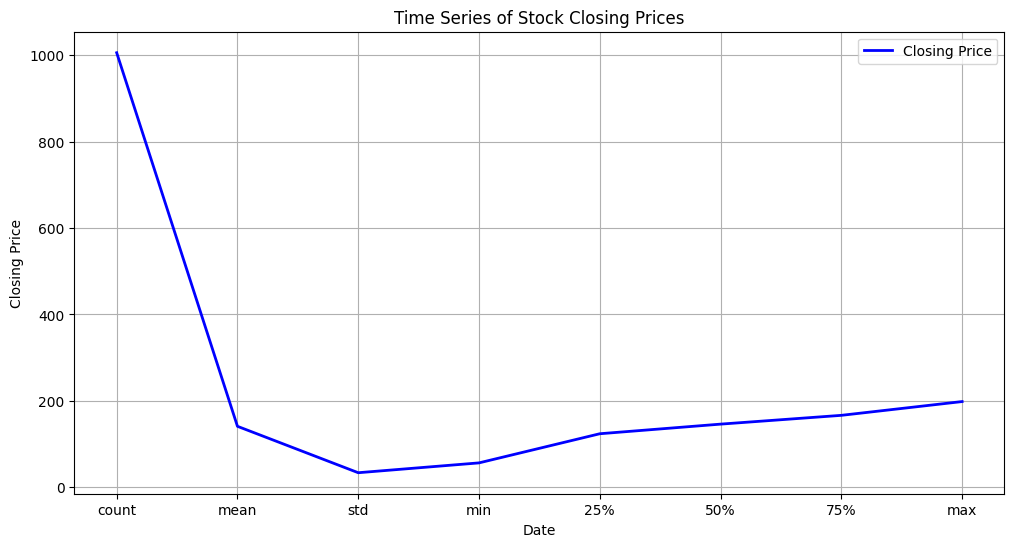

In [18]:
# Plot time series of stock closing prices
plt.figure(figsize=(12, 6))
plt.plot(cleaned_combined_data.index, cleaned_combined_data['Close'], color='blue', linewidth=2, label='Closing Price')
plt.title('Time Series of Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()


*Correlation Heatmap* - identify relationships between stock prices and volume, as well as potential multicollinearity issues in the data.

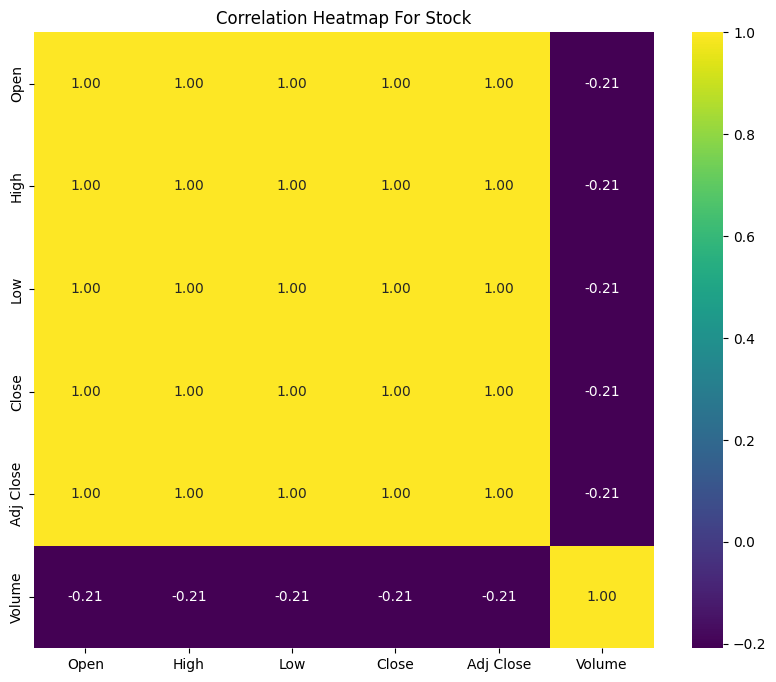

In [19]:
# Calculate the correlation matrix
correlation_matrix = cleaned_combined_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")  # Create the heatmap with annotations, using the 'viridis' colormap
plt.title('Correlation Heatmap For Stock')  # Set the title of the heatmap
plt.show()  # Display the heatmap


**Feature Engineering**

In [20]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib



--2024-05-27 07:47:34--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-05-27 07:47:34--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://psychz.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-05-27 07:47:34--  http://psychz.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolving p

In [21]:
import pandas as pd  # Import Pandas library as 'pd' for data manipulation and analysis
import numpy as np   # Import NumPy library as 'np' for numerical computing
import talib        # Import TA-Lib library for technical analysis indicators

# Generate Moving Averages
cleaned_combined_data['SMA_20'] = talib.SMA(cleaned_combined_data['Close'], timeperiod=20)  # Calculate 20-period Simple Moving Average (SMA)
cleaned_combined_data['EMA_20'] = talib.EMA(cleaned_combined_data['Close'], timeperiod=20)  # Calculate 20-period Exponential Moving Average (EMA)

# Calculate Bollinger Bands
cleaned_combined_data['upper_band'], cleaned_combined_data['middle_band'], cleaned_combined_data['lower_band'] = talib.BBANDS(
    cleaned_combined_data['Close'], timeperiod=20)  # Calculate Bollinger Bands with a 20-period moving average and 2 standard deviations

# Compute Relative Strength Index (RSI)
cleaned_combined_data['RSI'] = talib.RSI(cleaned_combined_data['Close'], timeperiod=14)  # Calculate 14-period Relative Strength Index (RSI)

# Calculate MACD
macd, signal, _ = talib.MACD(cleaned_combined_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)  # Calculate Moving Average Convergence Divergence (MACD)
cleaned_combined_data['MACD'] = macd  # Store MACD values in 'MACD' column
cleaned_combined_data['MACD_signal'] = signal  # Store MACD signal line values in 'MACD_signal' column

# Generate Lagged Features
cleaned_combined_data['lagged_close_1'] = cleaned_combined_data['Close'].shift(1)  # Generate lagged feature for 'Close' price with a lag of 1 time period

# Compute Rolling Windows
cleaned_combined_data['rolling_mean_5'] = cleaned_combined_data['Close'].rolling(window=5).mean()  # Compute 5-period rolling mean for 'Close' price

# Incorporate External Features
# (Code to incorporate sentiment scores, economic indicators, and relevant events)


Importing Libraries:

The code imports necessary libraries: Pandas for data manipulation, NumPy for numerical computing, and TA-Lib for technical analysis indicators.
Generating Moving Averages (SMA, EMA):

Simple Moving Average (SMA) and Exponential Moving Average (EMA) are calculated for the closing price of the stock over a 20-day period.
Calculating Bollinger Bands:

Bollinger Bands are calculated using the closing price with a 20-day moving average and 2 standard deviations.
Computing Relative Strength Index (RSI):

The Relative Strength Index (RSI) is computed based on the closing price over a 14-day period.
Calculating MACD (Moving Average Convergence Divergence):

MACD is calculated using the closing price with fast, slow, and signal periods set to 12, 26, and 9 days, respectively.
Generating Lagged Features:

A lagged feature is generated for the closing price, shifting it by one time period (e.g., one day) to capture temporal dependencies.
Computing Rolling Windows:

A rolling mean is computed for the closing price over a 5-day window to smooth out short-term fluctuations and highlight longer-term trends.
Incorporating External Features:

Placeholder for incorporating external features such as sentiment scores, economic indicators, and relevant events. This part of the code would be replaced with the actual code to incorporate these features.

In [22]:
print(cleaned_combined_data.dtypes)


Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume            float64
SMA_20            float64
EMA_20            float64
upper_band        float64
middle_band       float64
lower_band        float64
RSI               float64
MACD              float64
MACD_signal       float64
lagged_close_1    float64
rolling_mean_5    float64
dtype: object


In [23]:
print(cleaned_combined_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_20',
       'EMA_20', 'upper_band', 'middle_band', 'lower_band', 'RSI', 'MACD',
       'MACD_signal', 'lagged_close_1', 'rolling_mean_5'],
      dtype='object')


In [24]:
cleaned_combined_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,upper_band,middle_band,lower_band,RSI,MACD,MACD_signal,lagged_close_1,rolling_mean_5
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,140.675507,142.321389,139.143536,140.808131,139.024960,9.895211e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1006.000000,NaN
std,33.310018,33.430571,33.179199,33.313857,33.615819,5.439653e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.808131,NaN
min,57.020000,57.125000,53.152500,56.092499,54.632893,2.404830e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.313857,NaN
25%,123.682503,125.030003,122.157499,123.592501,121.328167,6.407675e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.092499,271.961398


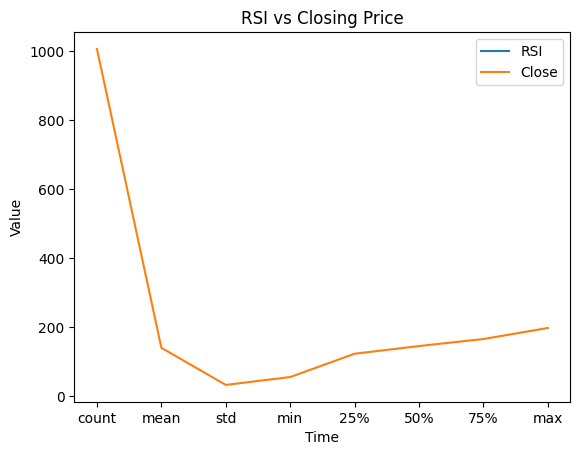

In [25]:
# @title RSI vs Closing Price

import matplotlib.pyplot as plt
plt.plot(cleaned_combined_data['RSI'], label='RSI')
plt.plot(cleaned_combined_data['Close'], label='Close')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('RSI vs Closing Price')
_ = plt.legend()

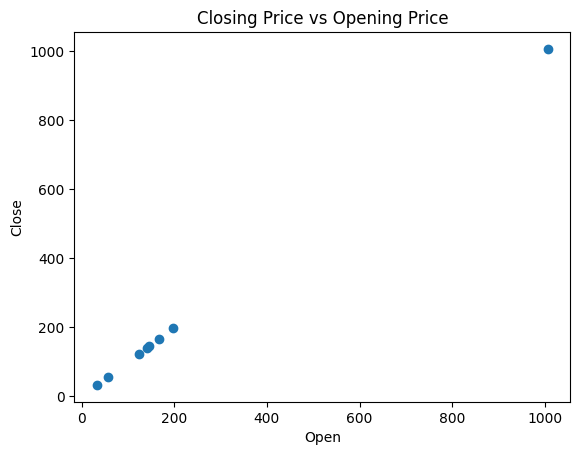

In [26]:
# @title Closing Price vs Opening Price

import matplotlib.pyplot as plt
plt.scatter(cleaned_combined_data['Open'], cleaned_combined_data['Close'])
plt.title('Closing Price vs Opening Price')
plt.xlabel('Open')
_ = plt.ylabel('Close')

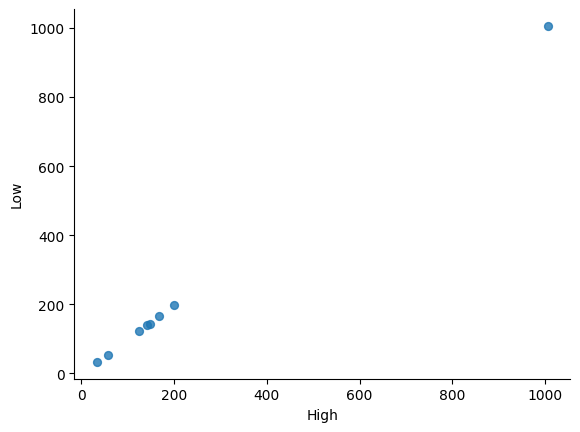

In [27]:
# @title High vs Low

from matplotlib import pyplot as plt
cleaned_combined_data.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

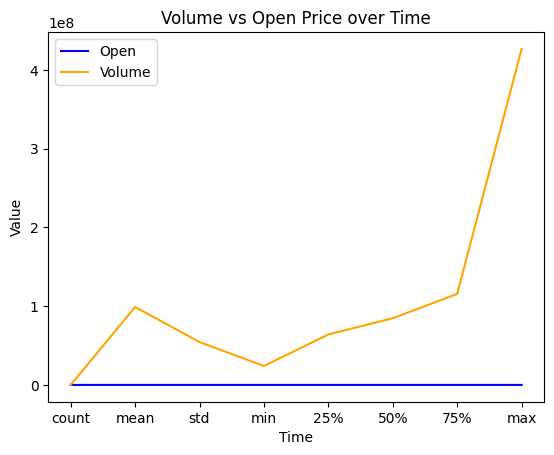

In [28]:
# @title Volume vs Open Price over Time

import matplotlib.pyplot as plt
plt.plot(cleaned_combined_data['Open'], color='blue', label='Open')
plt.plot(cleaned_combined_data['Volume'], color='orange', label='Volume')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Volume vs Open Price over Time')
_ = plt.legend()

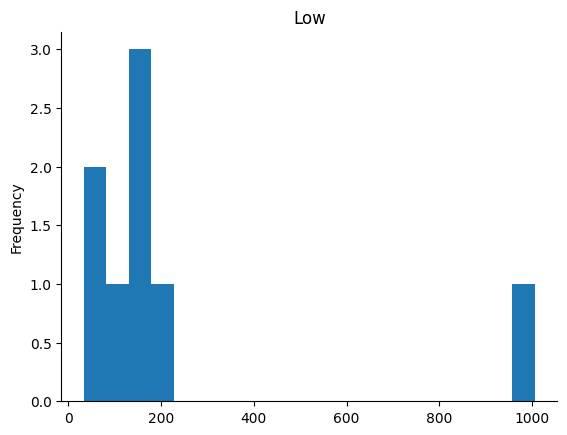

In [29]:
# @title Low

from matplotlib import pyplot as plt
cleaned_combined_data['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

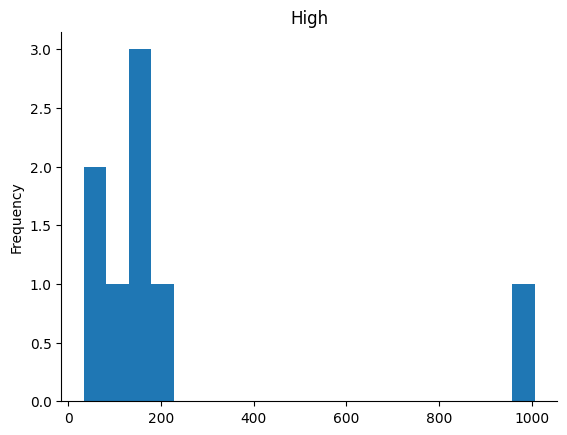

In [30]:
# @title High

from matplotlib import pyplot as plt
cleaned_combined_data['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

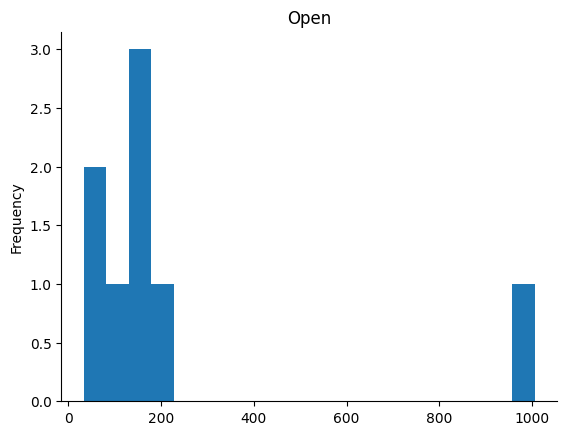

In [31]:
# @title Open

from matplotlib import pyplot as plt
cleaned_combined_data['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
                     'SMA_20', 'EMA_20', 'upper_band', 'middle_band', 'lower_band',
                     'RSI', 'MACD', 'MACD_signal', 'lagged_close_1', 'rolling_mean_5']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standardization to numerical columns
cleaned_combined_data[numerical_columns] = scaler.fit_transform(cleaned_combined_data[numerical_columns])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Trai - Test split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extracting 'High' as input feature (X) and 'Low' as target variable (y)
X = cleaned_combined_data[['High']]  # Input feature
y = cleaned_combined_data['Low']     # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 5.128564372578647e-06


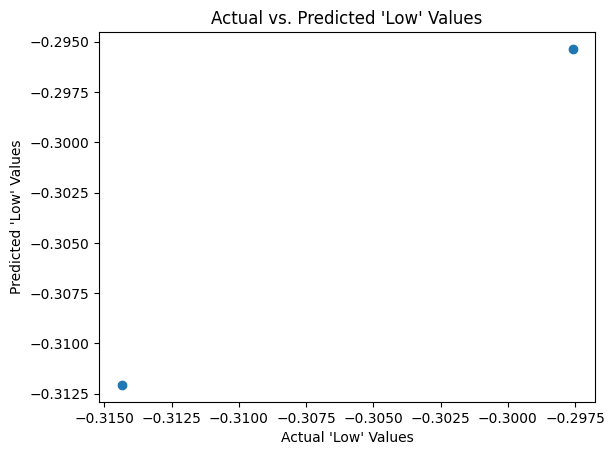

In [34]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual 'Low' Values")
plt.ylabel("Predicted 'Low' Values")
plt.title("Actual vs. Predicted 'Low' Values")
plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

# Assuming cleaned_combined_data is your dataframe
# Use 'High' as the feature and 'Low' as the target variable
X = cleaned_combined_data[['High']]
y = cleaned_combined_data['Low']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to a file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model trained and saved as 'trained_model.pkl'")


Model trained and saved as 'trained_model.pkl'


In [36]:
!pip uninstall flask-ngrok


Found existing installation: flask-ngrok 0.0.25
Uninstalling flask-ngrok-0.0.25:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/flask_ngrok-0.0.25.dist-info/*
    /usr/local/lib/python3.10/dist-packages/flask_ngrok.py
Proceed (Y/n)? Y
  Successfully uninstalled flask-ngrok-0.0.25


In [37]:
!pip install flask-ngrok


  Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)


In [ ]:


# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify

# Load the trained model
with open('trained_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Create a Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

# Define a route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the request
    data = request.json
    high = data['High']

    # Make prediction
    prediction = model.predict([[high]])[0]

    # Return the prediction
    return jsonify({'Low': prediction})

# Run the app
if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll